# Global Regulations & Risk

### Climate Change, Plastic, Water and Waste

In [1]:
import folium
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import numpy as np
from IPython.display import Image

In [2]:
geolocator = Nominatim(user_agent="FoodWasteCountry")
location = geolocator.geocode("European Union")


In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('max_colwidth', None)

In [4]:
climateChange = pd.read_excel("Policies.xlsx",sheet_name = "ClimateAction", index_col="Country")
climateChange['Most relevant Economy-wide targets'] = climateChange['Most relevant Economy-wide targets'].str.replace('\n','<br>')
climateChange.fillna('-', inplace=True)

In [5]:
plastic = pd.read_excel("Policies.xlsx",sheet_name = "Plastic (2)", index_col="Country")
plastic = plastic.drop(labels='Column1', axis=1)
plastic['Most relevant Economy-wide targets'] = plastic['Most relevant Economy-wide targets'].str.replace('\n','<br>')
plastic.fillna('-', inplace=True)


In [6]:
waste = pd.read_excel("Policies.xlsx",sheet_name = "Waste (2)", index_col="Country")
waste = waste.drop(labels='Column1', axis=1)
waste['Most relevant Economy-wide targets'] = waste['Most relevant Economy-wide targets'].str.replace('\n','<br>')
waste.fillna('-', inplace=True)


In [7]:
water = pd.read_excel("Policies.xlsx",sheet_name = "Water (2)", index_col="Country")
water['Most relevant Economy-wide targets'] = water['Most relevant Economy-wide targets'].str.replace('\n','<br>')
water.fillna('-', inplace=True)


In [15]:
default_lat = 31.7771 #default lat focused on the north atlantic ocean
default_long = -40.24965 #default long focused on the north atlantic ocean
default_zoom = 3
risk_color = {1:"red",2:"orange",3:"green",0:"black",float("NaN"):"lightgray"} #Select color of marker based on risk level

m = folium.Map(location=[default_lat,default_long],
               zoom_start=default_zoom)

for country in climateChange.index:
    #print("Climate Action: ", country)
    
    tooltip = country
    if (country == "Global/UN"):
        country2 = "Atlantic Ocean"
    elif (country == "France, Italy, Belgium, Spain Netherlands & Portugal"):
        country2 = "France"
    else: country2 = country
    
    #Nominatim for country locations
    if (country == "Mexico2"):
        country2 = "Mexico"
        tooltip = country2
        location = geolocator.geocode(country2)
        country_lat = location.latitude + 2
        country_long = location.longitude - 3
    else:
        location = geolocator.geocode(country2)
        country_lat = location.latitude
        country_long = location.longitude
    #Expand pop-up box to fit large text
    popupInfo = climateChange.loc[country]["Most relevant Economy-wide targets"]
    iframe = folium.IFrame(popupInfo,
                           width=510,
                           height=140)

    popup = folium.Popup(iframe,
                         max_width=1000)
    #Select icon based on condition
    if (country == "European Union"):
        icon = "pagelines"
    else:
        icon = "pagelines"
        
    folium.Marker(
        [country_lat, country_long], popup=popup, tooltip=tooltip, icon=folium.Icon(prefix="fa", icon=icon,color=risk_color[climateChange.loc[country]["Type of Risk (1-High, 2-Medium, 3-Low)"]])
    ).add_to(m)
    
 
for country in water.index:
    #print("Water: ", country)
    
    tooltip = country
    if (country == "Global/UN"):
        country2 = "Atlantic Ocean"
    elif (country == "Holanda, Belgica, Portugal, España, Francia, Rumania, Italia"):
        country2 = "France"
    else: country2 = country
    
    #Nominatim for country locations
    location = geolocator.geocode(country2)
    country_lat = location.latitude
    country_long = location.longitude
    
    #Expand pop-up box to fit large text
    if (water.loc[country]["Initiative"] != "-" or water.loc[country]["Initiative"] != "-" ):
        popupInfo = str(water.loc[country]["Initiative"])+":<br><br>"+water.loc[country]["Most relevant Economy-wide targets"]
    else: popupInfo = waste.loc[country]["Most relevant Economy-wide targets"]
        
    iframe = folium.IFrame(popupInfo,
                           width=510,
                           height=140)

    popup = folium.Popup(iframe,
                         max_width=1000)
    #Select icon based on condition
    if (country == "European Union"):
        icon = "tint"
    else:
        icon = "tint"
    folium.Marker(
        [country_lat-2, country_long-3], popup=popup, tooltip=tooltip, icon=folium.Icon(prefix="fa", icon=icon, color=risk_color[water.loc[country]["Type of Risk (1-High, 2-Medium, 3-Low)"]])
    ).add_to(m)
  
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
for country in plastic.index:
    #print("Plastic: ",country)
    
    tooltip = country
    if (country == "Global/UN"):
        country2 = "Atlantic Ocean"
    elif (country == "France, Italy, Belgium, Spain Netherlands & Portugal"):
        country2 = "France"
    else: country2 = country
    
    #Nominatim for country locations
    location = geolocator.geocode(country2)
    
    country_lat = location.latitude
    country_long = location.longitude
    
    #Expand pop-up box to fit large text
    if (plastic.loc[country]["Initiative"] != "-" or plastic.loc[country]["Initiative"] != "-" ):
        popupInfo = str(plastic.loc[country]["Initiative"])+":<br><br>"+plastic.loc[country]["Most relevant Economy-wide targets"]
    else: popupInfo = plastic.loc[country]["Most relevant Economy-wide targets"]
        
    iframe = folium.IFrame(popupInfo,
                           width=510,
                           height=140)

    popup = folium.Popup(iframe,
                         max_width=1000)
    #Select icon based on condition
    if (country == "European Union"):
        icon = "recycle"
    else:
        icon = "recycle"
    folium.Marker(
        [country_lat-3, country_long], popup=popup, tooltip=tooltip, icon=folium.Icon(prefix="fa", icon=icon, color=risk_color[plastic.loc[country]["Type of Risk (1-High, 2-Medium, 3-Low)"]])
    ).add_to(m)
    
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
for country in waste.index:
    #print("Waste: ",country)
    
    tooltip = country
    if (country == "Global/UN"):
        country2 = "Atlantic Ocean"
    elif (country == "France, Italy, Belgium, Spain Netherlands & Portugal"):
        country2 = "France"
    else: country2 = country
    
    #Nominatim for country locations
    location = geolocator.geocode(country2)
    country_lat = location.latitude
    country_long = location.longitude
    
    #Concatenate 2 columns for popup text
    if (waste.loc[country]["Targets"] != "-" or waste.loc[country]["Targets"] != "-" ):
        popupInfo = str(waste.loc[country]["Targets"])+":<br><br>"+waste.loc[country]["Most relevant Economy-wide targets"]
    else: popupInfo = waste.loc[country]["Most relevant Economy-wide targets"]
    
    #Expand pop-up box to fit large text    
    iframe = folium.IFrame(popupInfo,
                           width=510,
                           height=140)

    popup = folium.Popup(iframe,
                         max_width=1000)
    #Select icon based on condition
    if (country == "European Union"):
        icon = "trash"
    else:
        icon = "trash"
    folium.Marker(
        [country_lat-2, country_long+3], popup=popup, tooltip=tooltip, icon=folium.Icon(prefix="fa", icon=icon, color=risk_color[waste.loc[country]["Type of Risk (1-High, 2-Medium, 3-Low)"]])
    ).add_to(m)

m

### High risk plastic

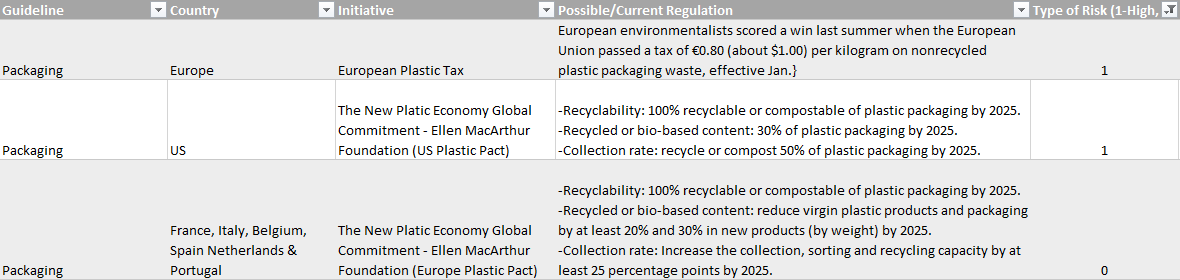

In [9]:
Image(filename="PlasticPic.png")

### High risk Climate Change

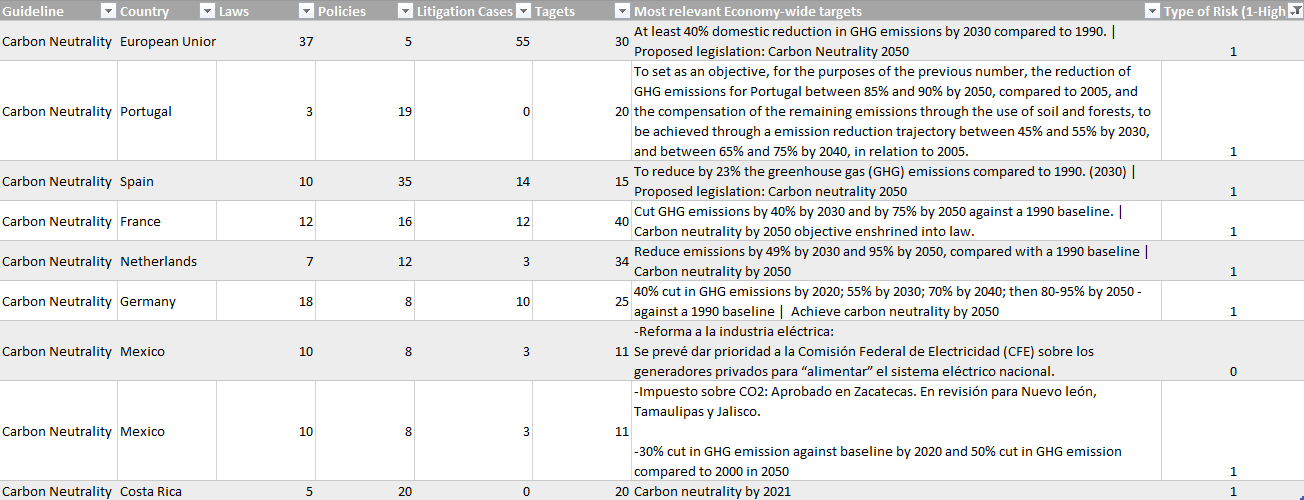

In [10]:
Image(filename="ClimatePic.png")

### High risk Water

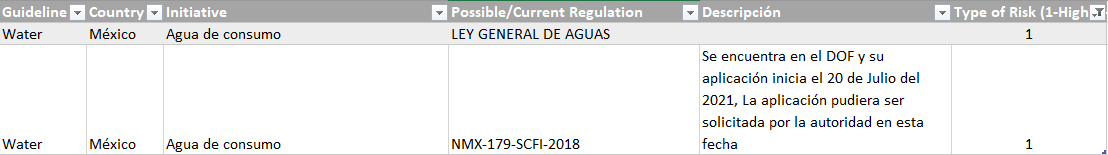

In [11]:
Image(filename="WaterPic.png")